In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd 'path to file'

In [3]:
## General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [4]:
## Importing the dataset
!ls
df = pd.read_csv('sales_data_sample.csv', encoding= 'unicode_escape')
## 25 features and 2823 datapoints
df.shape

Clustering  sales_data_sample.csv


(2823, 25)

In [5]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [7]:
## Checking datatypes
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [8]:
## Need to conver ORDERDATE to pandas datetime
df.ORDERDATE = pd.to_datetime(df.ORDERDATE)
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [9]:
## Will be dropping the following features. Since we are trying to figure out which regions to target the individual's information about 
## address, city, state, phone number, territory, customer name can be dropped.
## Order number can also be dropped because it doesn't give us much information.
df = df.drop(columns = ['ORDERNUMBER', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'])
df.shape

(2823, 14)

In [10]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [11]:
## In this way we also got rid of null values
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

Exploratory Analysis Section

In [12]:
## Examining the number of samples per country
fig = plt.figure(figsize= (20,20))
fig = px.bar(x = df['COUNTRY'].value_counts().index, y = df['COUNTRY'].value_counts(), title= "Samples for each country", color = df['COUNTRY'].value_counts().index)
fig.show()

<Figure size 1440x1440 with 0 Axes>

In [13]:
fig = plt.figure(figsize= (20,20))
fig = px.bar(x = df['PRODUCTLINE'].value_counts().index, y = df['PRODUCTLINE'].value_counts(), title= "Samples for each country", color = df['PRODUCTLINE'].value_counts().index)
fig.show()

<Figure size 1440x1440 with 0 Axes>

In [14]:
fig = plt.figure(figsize= (20,20))
fig = px.bar(x = df['STATUS'].value_counts().index, y = df['STATUS'].value_counts(), title= "Samples for each country", color=df['STATUS'].value_counts().index)
fig.show()

## Status maybe need to be investigated more on if the feature is relavent or not. It seems that it is heavily unbalanced. 
## Upsamling or downsampling don't seem like good options.
## Dropping status
df.drop(columns = ['STATUS'], axis = 1, inplace= True)

<Figure size 1440x1440 with 0 Axes>

In [15]:
fig = plt.figure(figsize= (20,20))
fig = px.bar(x = df['DEALSIZE'].value_counts().index, y = df['DEALSIZE'].value_counts(), title= "Samples for each country", color = df['DEALSIZE'].value_counts().index)
fig.show()

<Figure size 1440x1440 with 0 Axes>

In [16]:
## Converting categorical variables to dummy ones using pandas
def convert_categorical(feature_name):
  encoding = pd.get_dummies(df[feature_name], drop_first = False)
  df.drop(columns=[feature_name], inplace = True)
  return pd.concat([df, encoding], axis = 1)

In [17]:
df = convert_categorical('PRODUCTLINE')
df = convert_categorical('COUNTRY')
df = convert_categorical('DEALSIZE')
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,S72_3212,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,S72_3212,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,S72_3212,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,S72_3212,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
## Will be converting productline to categorical (ordering 0 to n)
## One-hot encoding is not viable due to the number of unique items avaliable. 
## One-hot encoding would add an extra 109 columns which is too many dimensions.
df_copy = df
df_copy['PRODUCTCODE'] = pd.Categorical(df_copy['PRODUCTCODE']).codes

In [19]:
df_copy

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,108,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,108,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,108,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,108,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
## Want to see which months are the most popular for products
df_copy = df_copy.groupby(by = 'ORDERDATE').sum()
df_copy

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small
ORDERDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174.0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,2
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181.0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,2,2
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723.0,3,0,0,0,0,7,6,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,10,6
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720.0,7,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,30,12030,728,101.0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,2,3,1
2005-05-17,509,1269.43,105,59475.10,28,70,28070,1669,462.0,14,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,4
2005-05-29,607,1148.40,94,51233.18,30,75,30075,1328,797.0,7,0,0,0,0,0,8,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,8,7


In [21]:
## Plotting sales to see if specific months are more popular
fig = plt.figure(figsize= (20,20))
fig = px.line(x = df_copy['SALES'].index, y = df_copy['SALES'], title= "Samples for each country")
fig.show()

<Figure size 1440x1440 with 0 Axes>

In [22]:
df_copy['SALES'].index
df.drop(columns= ['ORDERDATE'], axis = 1, inplace= True)

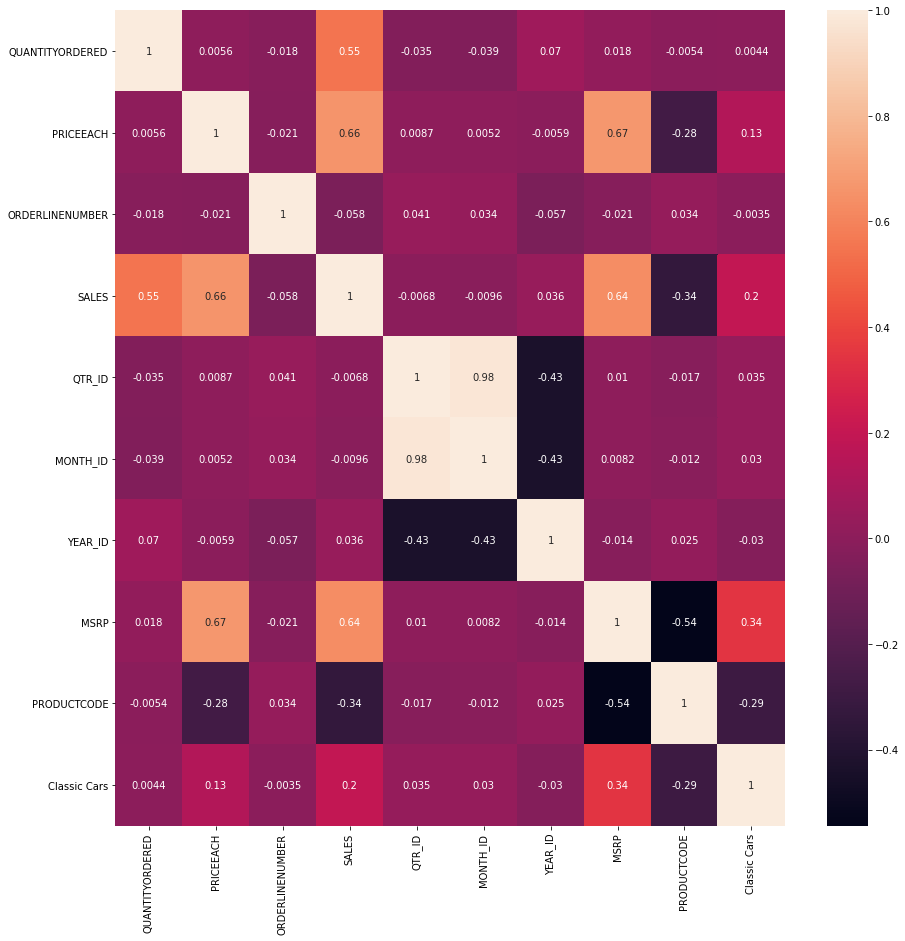

In [23]:
## Finding correlation between variables
correlation = df.iloc[:,:10].corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot = True)

In [24]:
## Dropping columns that are highly correlated since we can use either 
df.drop(columns = ['QTR_ID'], axis = 1, inplace= True)
df.shape

(2823, 37)

In [25]:
import plotly.figure_factory as figure

In [26]:
fig = plt.figure(figsize=(15,15))
for i in range(10):
  if df.columns[i] != 'ORDERLINENUMBER' and df.columns[i] != 'STATUS':
    ax = figure.create_distplot([df[df.columns[i]].apply(lambda x: float(x))], ['distplot'])
    ax.update_layout(title_text = df.columns[i])
    ax.show()

<Figure size 1080x1080 with 0 Axes>

In [27]:
plt.figure(figsize=(15,15))

fig = px.scatter_matrix(df, dimensions= df.columns[:8], color = "MONTH_ID")

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100
)
fig.show()

<Figure size 1080x1080 with 0 Axes>

In [28]:
## Clustering the data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [29]:
## will be first scaling the 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [30]:
df_scaled.shape

(2823, 37)

In [31]:
wss = []

for i in range(1, 10):
  kmeans = KMeans(n_clusters= i, init = 'k-means++')
  kmeans.fit(df_scaled)
  wss.append(kmeans.inertia_)

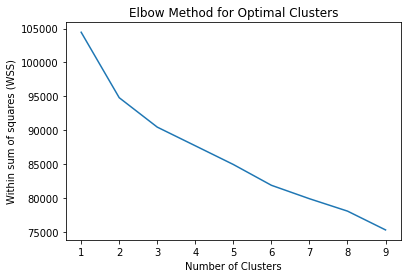

In [32]:
## Plotting WSS
len = range(1, 10)
plt.plot(len, wss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within sum of squares (WSS)')
plt.title("Elbow Method for Optimal Clusters")
plt.show()

## Optimal number of clusters is 4

In [33]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++')
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [34]:
labels

array([1, 1, 3, ..., 3, 1, 3], dtype=int32)

In [35]:
kmeans.cluster_centers_.shape

(5, 37)

In [37]:
cluster_df = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small
0,0.010285,0.152186,-0.131095,0.070903,0.473773,0.013539,0.101390,-0.164484,-0.093345,-0.200857,-0.179374,0.335664,-0.059748,0.279807,-0.010937,-0.264819,-0.140961,-0.108756,-0.159458,-0.151083,-0.183541,-0.353765,-0.149852,-0.075499,-0.204199,-0.136988,-0.176195,-0.096414,-0.169676,-0.371278,6.966083,-0.105371,-0.231843,-0.742934,-0.089568,0.107222,-0.066429
1,-0.452498,-0.769647,0.031762,-0.821178,0.019338,-0.030481,-0.596494,0.191776,-0.078639,0.079998,-0.348674,0.108264,0.113905,-0.003941,0.177175,0.024088,-0.021591,0.044740,0.005583,0.004049,-0.013190,0.019383,-0.006010,-0.002240,0.015566,-0.027923,-0.015285,-0.010057,0.035952,0.021989,-0.143553,-0.026214,0.009784,-0.000027,-0.242672,-0.980703,1.096370
2,1.264271,0.800092,-0.261504,2.581716,-0.085287,0.144435,1.412341,-0.861488,0.569706,0.016566,-0.161898,-0.300637,-0.127846,-0.199144,-0.146484,-0.082322,0.045752,-0.108756,-0.117969,0.110980,-0.001866,0.077142,0.026228,0.096382,0.026185,0.006951,0.012571,-0.028876,-0.013206,-0.035153,-0.143553,-0.105371,-0.114551,0.119599,4.120788,-0.980703,-0.912100
3,0.259248,0.605477,-0.042492,0.475977,-0.008456,-0.026202,0.431195,-0.259456,0.168848,0.020625,-0.325232,-0.004023,-0.043178,0.095285,-0.016849,-0.019414,0.023075,0.004243,0.001961,0.013369,0.012550,-0.006098,-0.000683,-0.032354,-0.088541,-0.034618,0.008597,0.005303,0.016885,0.015838,-0.143553,0.065562,0.018413,0.046976,-0.242672,1.018057,-0.910474
4,-0.080859,-0.143043,0.230985,-0.337311,-0.085752,0.148965,-0.373481,0.891602,-0.721812,-0.364452,2.868012,-0.300637,-0.167454,-0.345470,-0.523371,0.089654,-0.014029,-0.108756,0.066181,-0.103575,0.033831,-0.018975,0.041674,0.111460,0.350687,0.280521,0.049662,0.050510,-0.169676,-0.059434,-0.143553,-0.105371,-0.008575,-0.119915,-0.242672,-0.145457,0.257746


In [38]:
cluster_df = scaler.inverse_transform(cluster_df)
cluster_df = pd.DataFrame(data = cluster_df, columns = [df.columns])
cluster_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small
0,35.192982,86.728246,5.912281,3684.459825,8.824561,2003.824561,104.789474,48.578947,2.982456e-01,5.263158e-02,5.263158e-02,1.754386e-01,1.754386e-02,1.929825e-01,2.105263e-01,1.387779e-17,1.387779e-17,5.204170e-18,0.000000,1.387779e-17,1.387779e-17,8.326673e-17,3.469447e-17,-1.734723e-18,-6.938894e-18,-2.081668e-17,2.081668e-17,-8.673617e-18,3.469447e-18,-4.163336e-17,1.000000e+00,-3.469447e-18,2.775558e-17,-1.665335e-16,3.508772e-02,5.438596e-01,4.210526e-01
1,30.685610,68.134216,6.600367,2041.657113,7.163153,2003.793767,76.747938,59.829514,3.052246e-01,1.429881e-01,-1.013079e-15,1.127406e-01,4.582951e-02,1.054079e-01,2.878093e-01,7.149404e-02,1.649863e-02,1.649863e-02,0.025665,2.291476e-02,3.024748e-02,1.173236e-01,2.108158e-02,5.499542e-03,4.307974e-02,1.466544e-02,2.749771e-02,8.249313e-03,3.391384e-02,1.283226e-01,-6.938894e-17,8.249313e-03,5.316224e-02,3.556370e-01,7.285839e-16,-1.054712e-15,1.000000e+00
2,47.406452,99.796968,5.361290,8308.219097,6.780645,2003.916129,157.464516,26.567742,6.129032e-01,1.225806e-01,5.806452e-02,-1.110223e-16,6.451613e-03,4.516129e-02,1.548387e-01,4.516129e-02,2.580645e-02,-2.081668e-17,0.006452,3.870968e-02,3.225806e-02,1.354839e-01,2.580645e-02,1.290323e-02,4.516129e-02,1.935484e-02,3.225806e-02,6.451613e-03,2.580645e-02,1.096774e-01,3.122502e-17,4.336809e-17,2.580645e-02,4.129032e-01,1.000000e+00,-7.771561e-16,1.110223e-15
3,37.617814,95.871433,6.286640,4430.419587,7.061538,2003.796761,118.041296,45.579757,4.226721e-01,1.238866e-01,7.287449e-03,8.178138e-02,2.024291e-02,1.360324e-01,2.080972e-01,6.072874e-02,2.267206e-02,1.214575e-02,0.025101,2.429150e-02,3.481781e-02,1.093117e-01,2.186235e-02,3.238866e-03,2.267206e-02,1.376518e-02,3.157895e-02,9.716599e-03,3.076923e-02,1.263158e-01,7.632783e-17,1.781377e-02,5.506073e-02,3.781377e-01,4.163336e-17,9.991903e-01,8.097166e-04
4,34.305263,80.773263,7.442105,2932.717825,6.778947,2003.919298,85.708772,81.929825,-5.551115e-16,-7.771561e-16,1.000000e+00,3.885781e-16,-1.491862e-16,-2.775558e-16,-2.775558e-16,8.771930e-02,1.754386e-02,4.510281e-17,0.035088,7.017544e-03,3.859649e-02,1.052632e-01,2.807018e-02,1.403509e-02,1.087719e-01,5.614035e-02,3.859649e-02,1.403509e-02,1.006140e-16,1.017544e-01,9.367507e-17,6.418477e-17,4.912281e-02,2.982456e-01,-9.714451e-17,4.175439e-01,5.824561e-01


In [39]:
kmeans_prediction = kmeans.fit_predict(df_scaled)
kmeans_prediction

array([2, 2, 1, ..., 1, 2, 1], dtype=int32)

In [40]:
kmeans_prediction.shape

(2823,)

In [42]:
## Will be adding clusters to the original dataframe
df_with_clusters = pd.concat([df, pd.DataFrame({'Cluster': kmeans.labels_})], axis = 1)

In [43]:
df_with_clusters

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Large,Medium,Small,Cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
1,34,81.35,5,2765.90,5,2003,95,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
2,41,94.74,2,3884.34,7,2003,95,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,45,83.26,6,3746.70,8,2003,95,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
4,49,100.00,14,5205.27,10,2003,95,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2
2819,29,100.00,1,3978.51,1,2005,54,108,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2820,43,100.00,4,5417.57,3,2005,54,108,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2821,34,62.24,1,2116.16,3,2005,54,108,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2


In [50]:
df.info()

##Converting columns that require converting to float
df_with_clusters['ORDERLINENUMBER'] = df_with_clusters['ORDERLINENUMBER'].apply(lambda x: float(x))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   float64
 3   SALES             2823 non-null   float64
 4   MONTH_ID          2823 non-null   int64  
 5   YEAR_ID           2823 non-null   int64  
 6   MSRP              2823 non-null   int64  
 7   PRODUCTCODE       2823 non-null   int8   
 8   Classic Cars      2823 non-null   uint8  
 9   Motorcycles       2823 non-null   uint8  
 10  Planes            2823 non-null   uint8  
 11  Ships             2823 non-null   uint8  
 12  Trains            2823 non-null   uint8  
 13  Trucks and Buses  2823 non-null   uint8  
 14  Vintage Cars      2823 non-null   uint8  
 15  Australia         2823 non-null   uint8  
 16  Austria           2823 non-null   uint8  


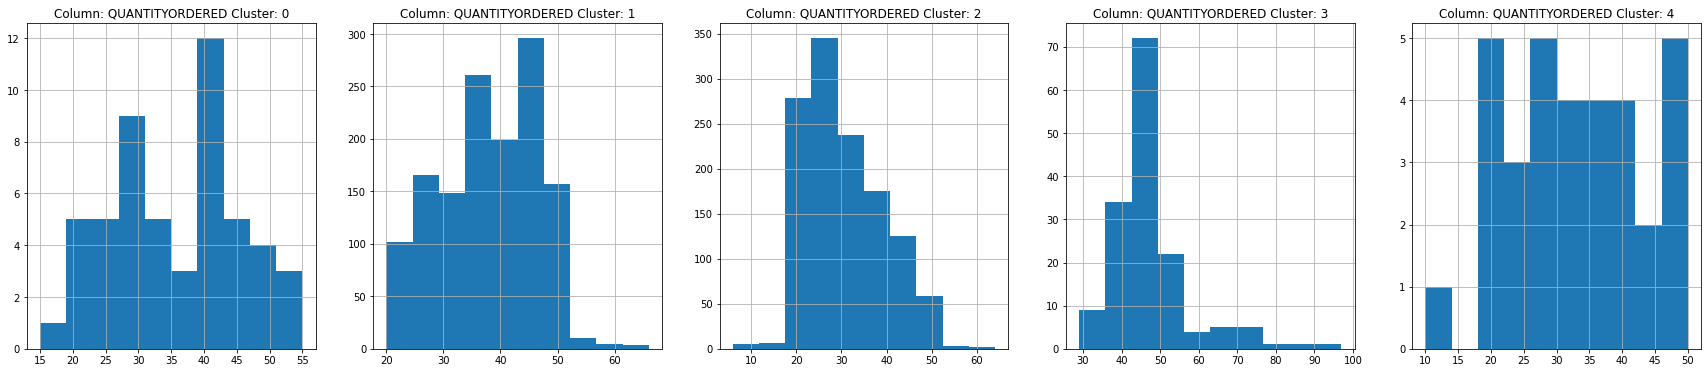

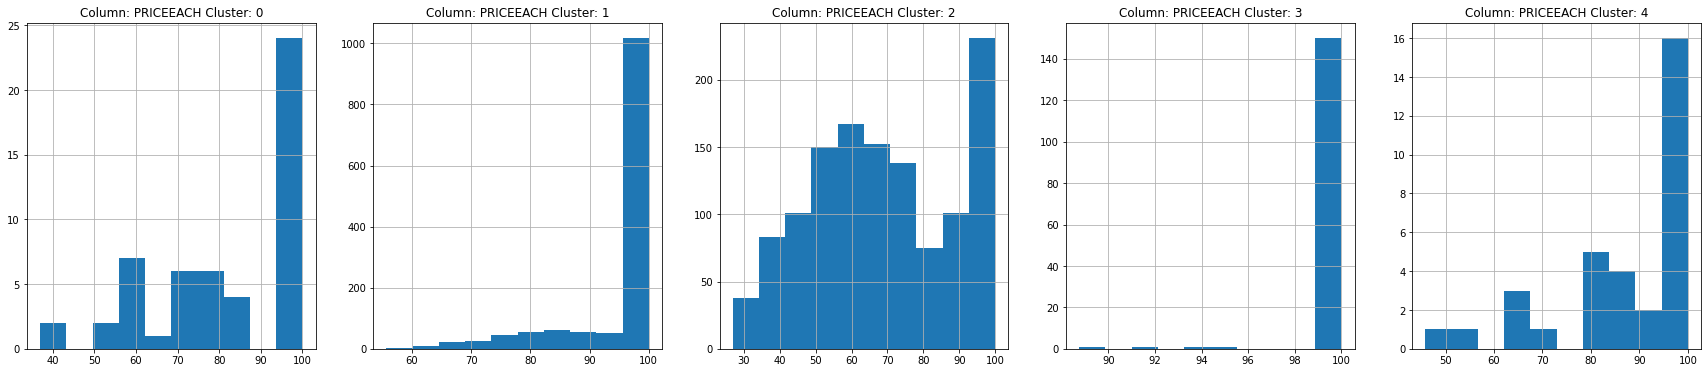

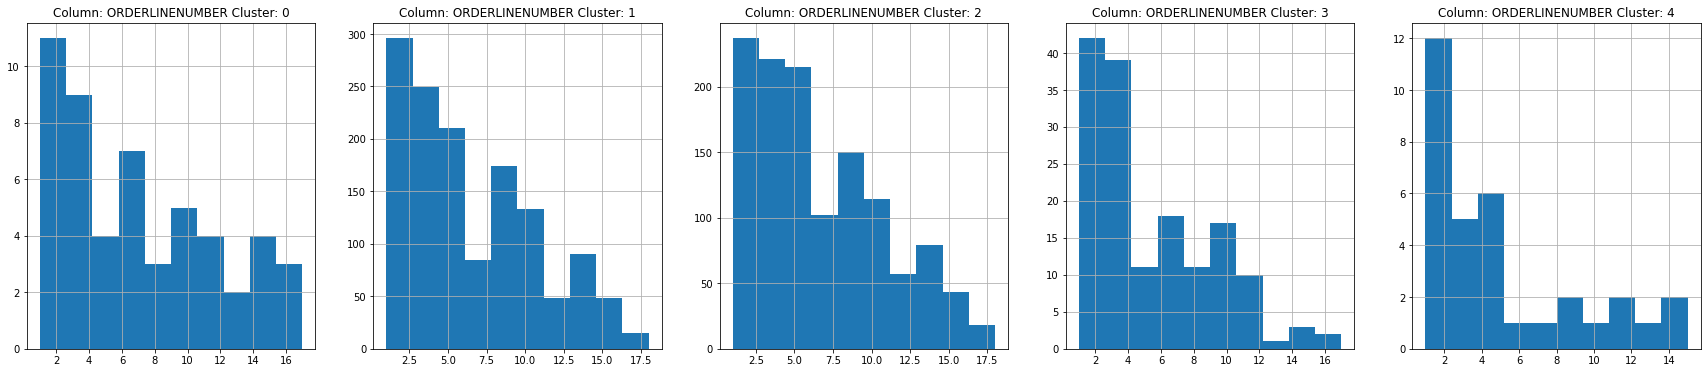

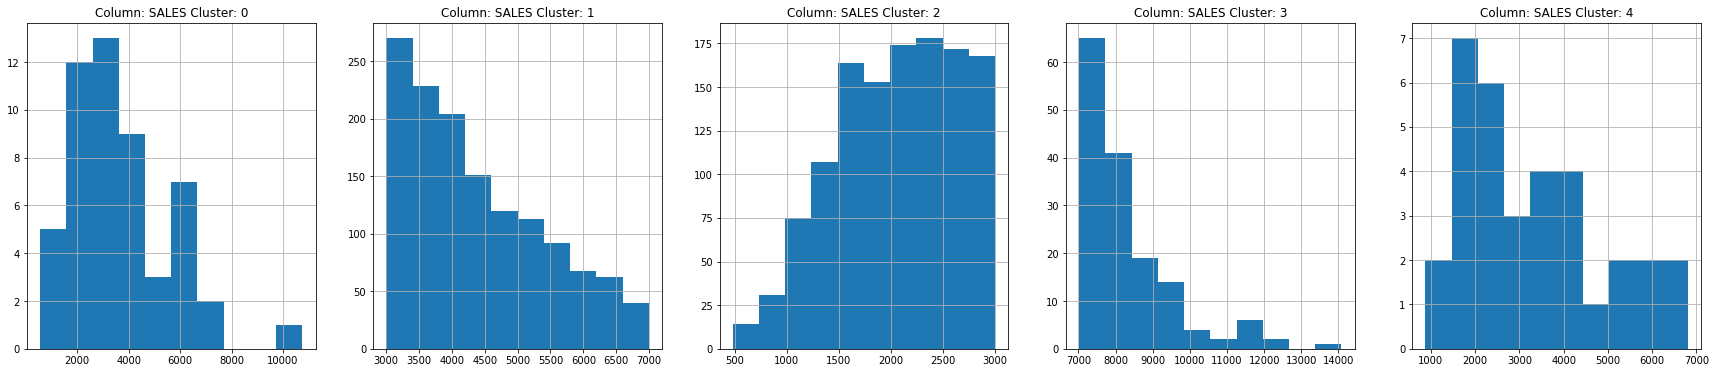

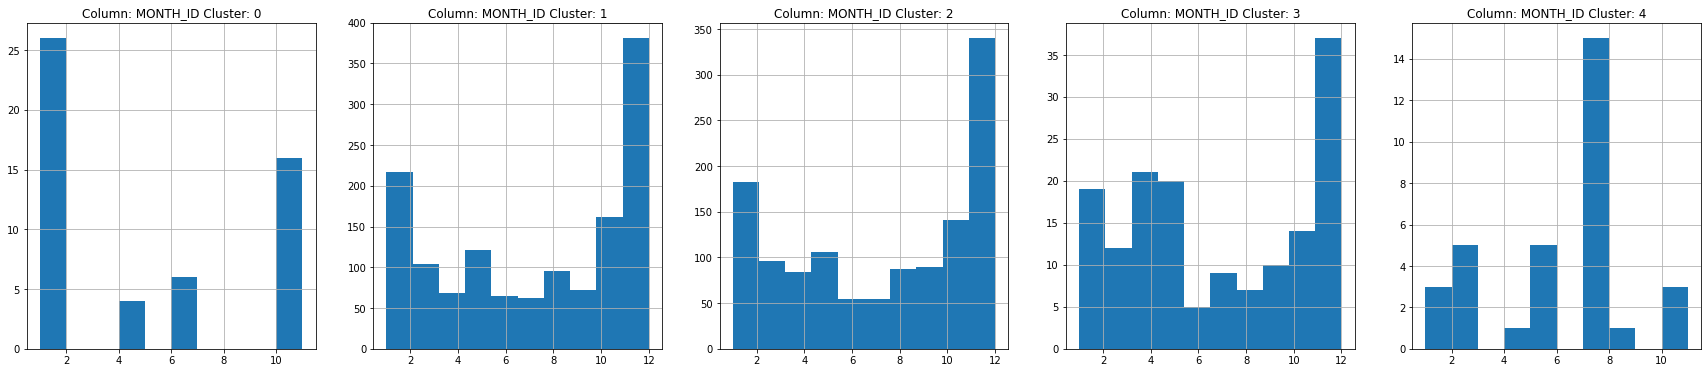

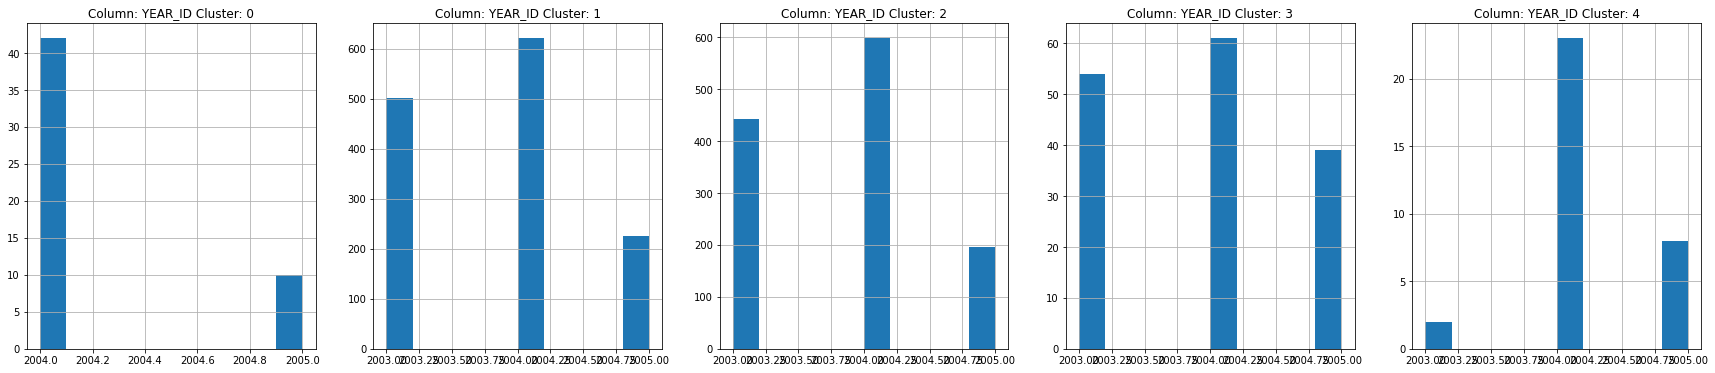

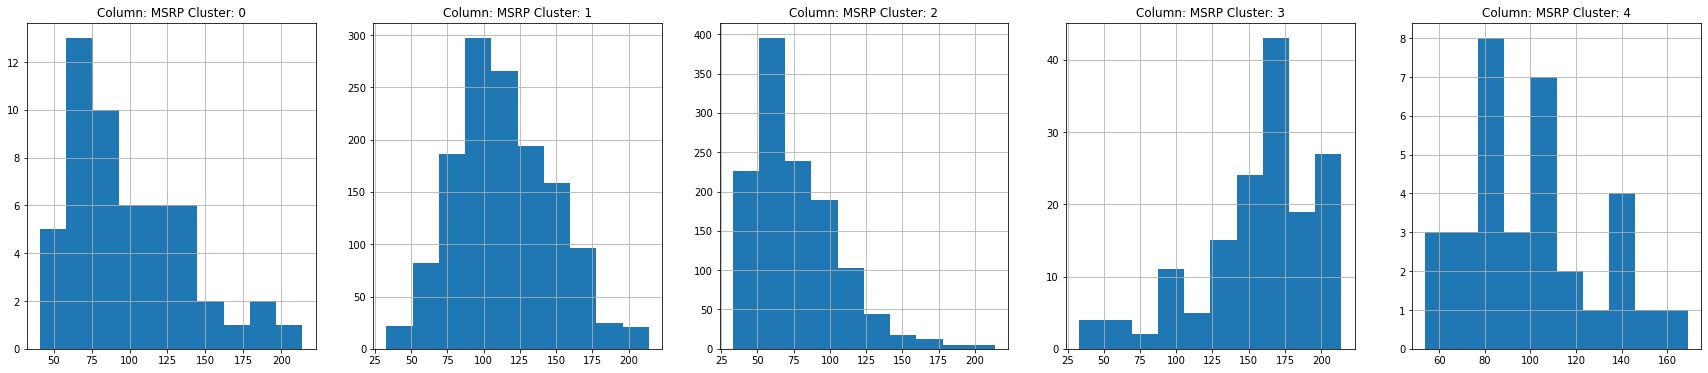

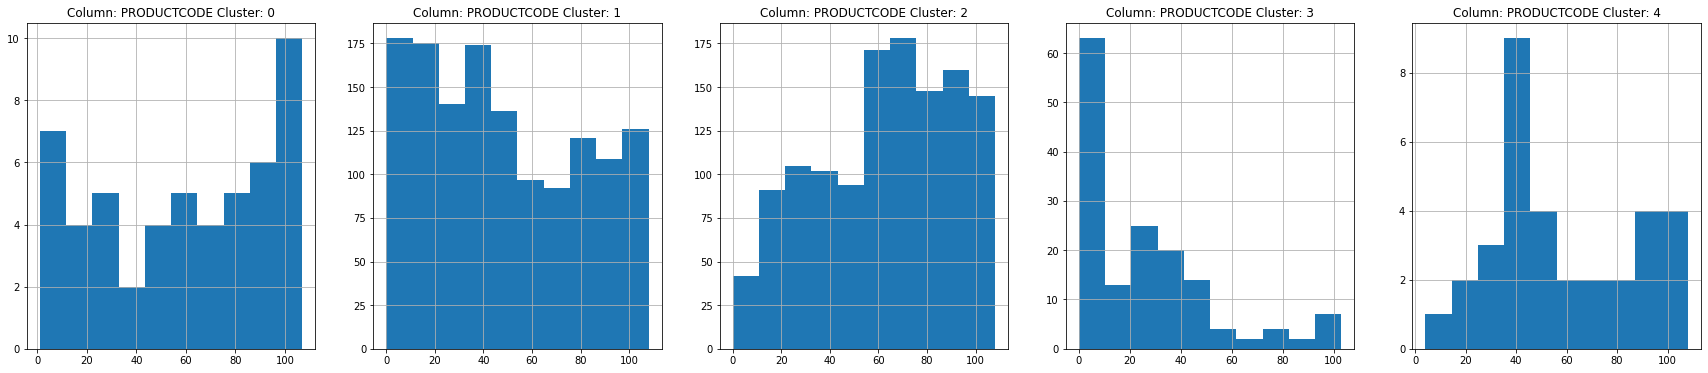

In [51]:
## Plotting data points associated with each cluster
for i in df.columns[:8]:
  plt.figure(figsize=(30, 6))
  for j in range(5):
    plt.subplot(1, 5, j+1)
    cluster = df_with_clusters[df_with_clusters['Cluster'] == j]
    cluster[i].hist()
    plt.title('Column: {} Cluster: {}'.format(i, j))
  plt.show()